# 自訂(Custom) Callback

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


# 匯入 MNIST 手寫阿拉伯數字 訓練資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()


# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [2]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [6]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [7]:
y_train_one_hot_encoding = tf.keras.utils.to_categorical(y_train)

In [4]:
import pandas as pd

df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])

In [5]:
class CustomCallback_2(tf.keras.callbacks.Callback):
    def __init__(self):
        self.task_type=''
        self.epoch=0
        self.batch=0
        self.df = pd.DataFrame(columns=['epoch', 'batch', 'metrics'])
        
    def on_train_begin(self, logs=None):
        self.task_type='訓練'
        print("訓練開始...")

    def on_train_end(self, logs=None):
        print(self.df.shape)
        global df
        df = self.df
        print("訓練結束.")

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch=epoch
#         print(f"{self.task_type}第 {epoch} 執行週期開始...")

#     def on_epoch_end(self, epoch, logs=None):
#         print(f"{self.task_type}第 {epoch} 執行週期結束.")

#     def on_test_begin(self, logs=None):
#         self.task_type='測試'
#         print("測試開始...")

#     def on_test_end(self, logs=None):
#         print("測試結束.")

#     def on_predict_begin(self, logs=None):
#         self.task_type='預測'
#         print("預測開始...")

#     def on_predict_end(self, logs=None):
#         print("預測結束.")

#     def on_train_batch_begin(self, batch, logs=None):
#         print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

    def on_train_batch_end(self, batch, logs=None):
        # 新增資料至 df2 DataFrame
#         print(f"訓練 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")
#         df2 = pd.DataFrame([[self.epoch, self.batch, logs["loss"]]], columns=['epoch', 'batch', 'weight'])
#         df2 = pd.DataFrame([[self.epoch, self.batch, self.model.get_weights()]], columns=['epoch', 'batch', 'weight'])
        df2 = pd.DataFrame([[self.epoch, batch, logs["loss"]]], columns=['epoch', 'batch', 'metrics'])
        self.df = self.df.append(df2, ignore_index=True)

#     def on_test_batch_begin(self, batch, logs=None):
#         print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

#     def on_test_batch_end(self, batch, logs=None):
#         print(f"測試 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")

#     def on_predict_batch_begin(self, batch, logs=None):
#         print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次開始...")

#     def on_predict_batch_end(self, batch, logs=None):
#         print(f"預測 第 {self.epoch} 執行週期, 第 {batch} 批次結束.")


In [8]:
model.fit(x_train_norm, y_train_one_hot_encoding, epochs=15, batch_size=256, verbose=0, validation_split=0.2, callbacks=[CustomCallback_2()])

訓練開始...
(2820, 3)
訓練結束.


In [9]:
df.to_excel('./custom_callback.xlsx')

In [10]:
df.head()

,epoch,batch,metrics
0,0,0,0.091710
1,0,1,0.089310
2,0,2,0.085851
3,0,3,0.082274
4,0,4,0.080655


In [11]:
# 取得最後一層的權重

# import numpy as np
# # weights
# np.array(df.loc[0,'metrics'])[-1].shape



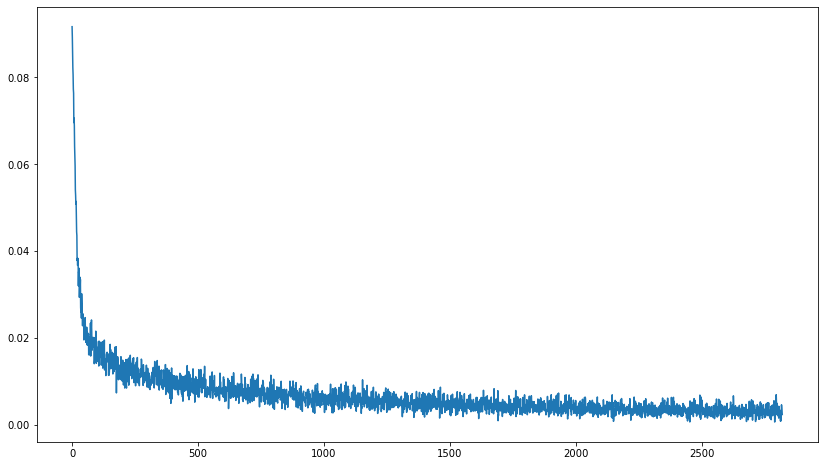

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(df.metrics)

In [55]:
df.tail()

,epoch,batch,metrics
2815,14,183,0.000374
2816,14,184,0.001028
2817,14,185,0.000364
2818,14,186,0.001573
2819,14,187,0.001391


In [13]:
df2 = df.groupby(by='epoch').min()
df2

,batch,metrics
epoch,,
0,0,0.007290
1,0,0.006928
2,0,0.004871
3,0,0.003680
4,0,0.003040
5,0,0.002596
6,0,0.001799
7,0,0.001490
8,0,0.000880


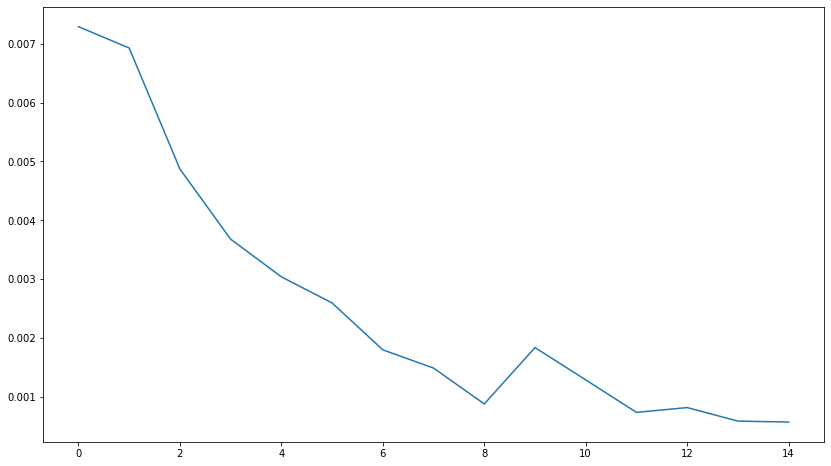

In [14]:
plt.figure(figsize=(14,8))
plt.plot(df2.index, df2.metrics)